In [1]:
import sqlite3 as sql
import pandas as pd
from datetime import timedelta
import missingno as mssgno

In [4]:
archivo = "../data/eplusout.sql"


myconn = sql.connect(archivo)
mycursor = myconn.cursor()
# Executar comando para extraer nombre de variables
comando = "SELECT ReportDataDictionaryIndex, KeyValue, Name, Units FROM ReportDataDictionary"
variables = pd.read_sql_query(comando,con=myconn)
# 4. Executar comando para encontrar datos de tiempo
comando = "SELECT tm.TimeIndex, tm.Year, tm.Month, tm.Day, tm.Hour, tm.Minute FROM Time AS tm"
tiempo = pd.read_sql_query(comando,con=myconn)
# elimina a~nos con valor 0
tiempo = tiempo[tiempo.Year!=0]
# comando para extraer datos
comando = """SELECT ReportData.TimeIndex, ReportData.ReportDataDictionaryIndex, ReportData.Value
  FROM (ReportData INNER JOIN ReportDataDictionary ON ReportData.ReportDataDictionaryIndex = ReportDataDictionary.ReportDataDictionaryIndex) 
  INNER JOIN Time ON ReportData.TimeIndex = Time.TimeIndex"""
data = pd.read_sql_query(comando,con=myconn)
# combina dataframes de datos y variables
datos_variables = pd.merge(data,variables)
# combine dataframes with data, variables and time 
datos_variables_tiempo = pd.merge(datos_variables,tiempo)
# makes a df copy
df = datos_variables_tiempo.copy()
# create date time with only year, month day
df['fecha'] = pd.to_datetime(df[['Year','Month','Day']])
# shifts + 1 day when hour == 24
df.loc[df.Hour==24,'fecha'] += pd.Timedelta('1D')
# cambia la hora de 24 a 0 
df.loc[df.Hour==24,'Hour'] = 0
# rehace la fecha usando el tiempo
df['fecha'] = pd.to_datetime(df[['Year','Month','Day','Hour','Minute']])
df['nombre_variable'] = df.KeyValue + ':' + df.Name + ' (' + df.Units + ')'
df  = df.pivot_table(index="fecha", columns="nombre_variable", values="Value")

In [5]:
df.columns

Index(['Environment:Site Outdoor Air Drybulb Temperature (C)',
       'N1AU401:Zone Air Relative Humidity (%)',
       'N1AU401:Zone Air Temperature (C)',
       'N1AU401:Zone Mean Air Temperature (C)',
       'N1AU402:Zone Air Relative Humidity (%)',
       'N1AU402:Zone Air Temperature (C)',
       'N1AU402:Zone Mean Air Temperature (C)',
       'N1AU403:Zone Air Relative Humidity (%)',
       'N1AU403:Zone Air Temperature (C)',
       'N1AU403:Zone Mean Air Temperature (C)',
       'N1AU404:Zone Air Relative Humidity (%)',
       'N1AU404:Zone Air Temperature (C)',
       'N1AU404:Zone Mean Air Temperature (C)',
       'N2AU101:Zone Air Relative Humidity (%)',
       'N2AU101:Zone Air Temperature (C)',
       'N2AU101:Zone Mean Air Temperature (C)',
       'N2AU102:Zone Air Relative Humidity (%)',
       'N2AU102:Zone Air Temperature (C)',
       'N2AU102:Zone Mean Air Temperature (C)',
       'N2AU103:Zone Air Relative Humidity (%)',
       'N2AU103:Zone Air Temperature (C)',
     

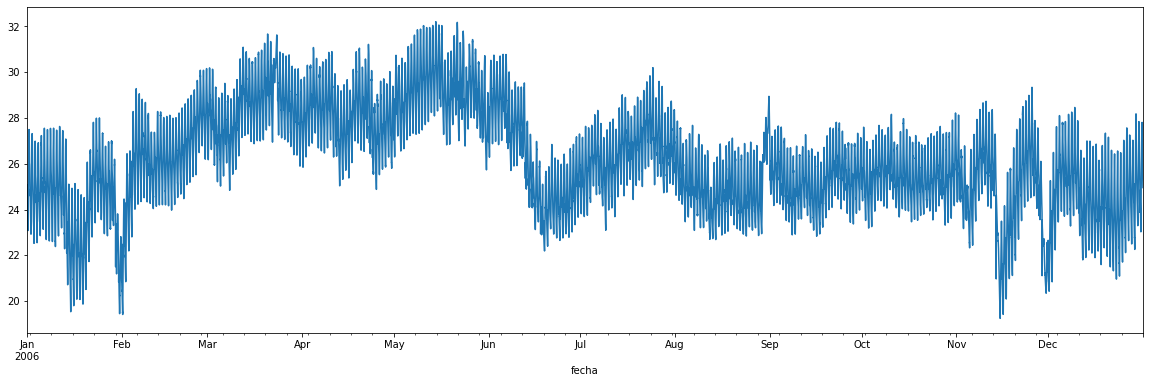

In [7]:
df['N1AU401:Zone Mean Air Temperature (C)'].plot(subplots=True,figsize = (20,6));
